# Model fitting Part 1: Template matching

A model is an informative representation of an object, person or system. It is a way of describing the object or system in terms of its properties. The problem of model fitting is fundamental in computer vision and machine learning. It can be broken down into two parts:
- Fitting: find the parameters of a model that best fit the data
- Alignment: find the parameters of the transformation that best align matched points

A model can be as simple as a line or as complex as a 3D object. In this module we will see examples of fitting models to data, starting from a simple model type, known as edge image template and then moving to more complex models.

### Template matching

What is a Template? A template is an example of how an object looks.

Template matching is a technique in digital image processing for finding small parts of an image which match a template image or a patch. The goal of template matching is to find the patch/template in an image. To find it, the user has to give two input images: Source Image (S) – The image to find the template in, and a Template Image (T) – The image that is to be found in the source image. It is basically a method for searching and finding the location of a template image in a larger image.
    
How does Template Matching Work?
- The template image simply slides over the input image (as in 2D convolution)
- The template and the patch of input image under the template image are compared.
- The result obtained is compared with the threshold.
- If the result is greater than the threshold, the portion will be marked as detected.
- In the function `cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)` the first parameter is the mainimage, the second parameter is the template to be matched and the third parameter is the method used for matching, in this case we use the normalized cross-correlation.

### Sample application

Let's consider a the mobile game "Clash of Clans" where the player has to tap on the elixir icon to collect it. Let's assume we want to create a program that will load the game and collect the elixir for us from time to time. To collect do so, the program needs to find the location of the elixir icon in the screen. That can easily be done using the template matching method.

In [58]:
# Necessary imports
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

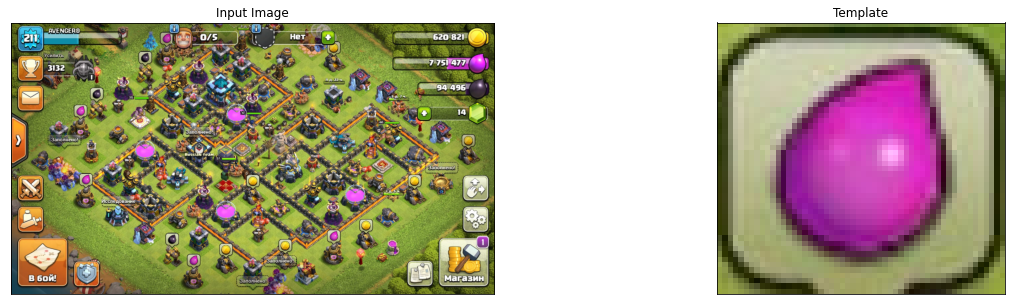

In [59]:
img = cv.imread('data/clash-of-clans-base.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
template = cv.imread('data/elixir_pump_template.jpg')
template = cv.cvtColor(template, cv.COLOR_BGR2RGB)

# Display the images
plt.figure(figsize = (20,5))
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(template, cmap='gray')
plt.title('Template'), plt.xticks([]), plt.yticks([])
plt.show()

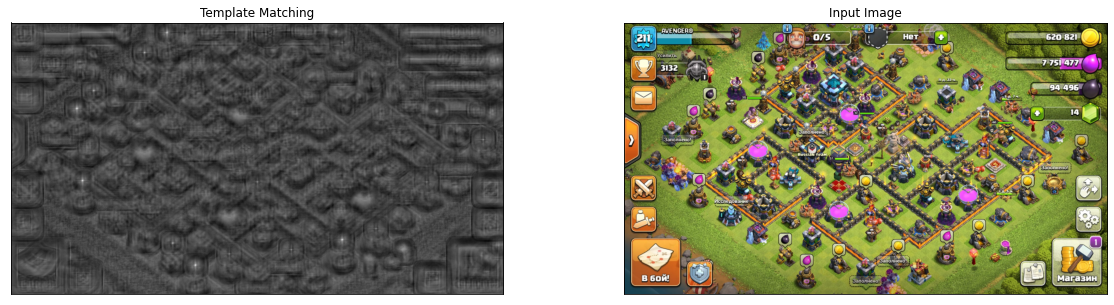

In [60]:
# Apply template Matching
result = cv.matchTemplate(img, template, cv.TM_CCOEFF_NORMED)

# Visualize the result
plt.figure(figsize = (20,5))
plt.subplot(121), plt.imshow(result, cmap='gray')
plt.title('Template Matching'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.show()

In the template matching result avobe, the more white a pixel is the better the match of the top left corner of the template with that particular location in the image. Let's check what is the maximum value of the template matching result.

In [61]:
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)

print(max_val)
print(max_loc)

0.9982191324234009
(698, 920)


We notice that the maximum value is around 0.998 and the location of the maximum value in the image is at pixel (698, 920). Let's go ahead a draw a white rectangle around the location of the best match.

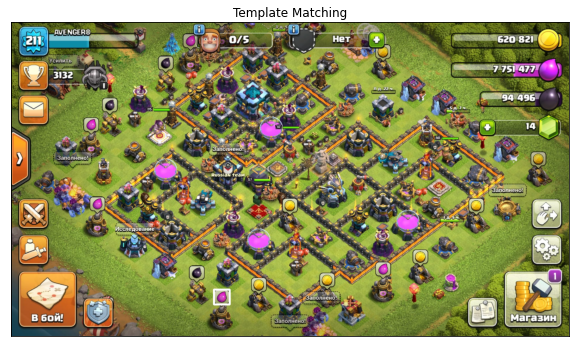

In [62]:
h, w, c = template.shape
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
img = cv.rectangle(img, top_left, bottom_right, (255, 255, 255), 5)

# Display the image with a rectangle drawn on it
plt.figure(figsize = (10,15))
plt.imshow(img)
plt.title('Template Matching'), plt.xticks([]), plt.yticks([])
plt.show()

We can see the rectangle draw towards the bottom center of the image. The next question is, what if we want to detect not just the best match, but all the elixir icons in the image? To do so, we have to use a threhold.

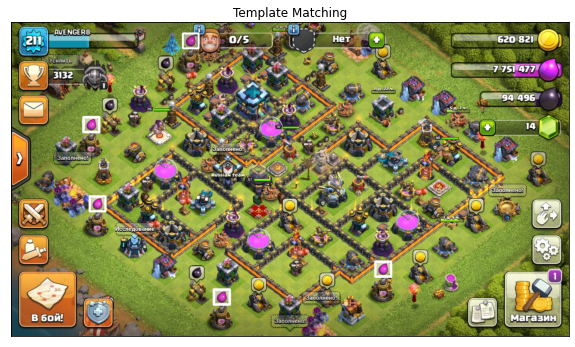

In [63]:
threshold = 0.8
loc = np.where( result >= threshold)
for pt in zip(*loc[::-1]):
    cv.rectangle(img, pt, (pt[0] + w, pt[1] + h), (255, 255, 255), 5)

# Display the image with a rectangle drawn on it
plt.figure(figsize = (10,15))
plt.imshow(img)
plt.title('Template Matching'), plt.xticks([]), plt.yticks([])
plt.show()